In [2]:
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### 1 task

(23.570590684620427, 28.853651739621995)


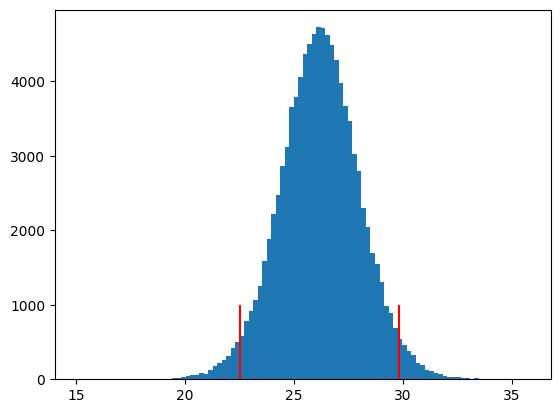

In [3]:
data = [28, 26, 33, 24, 34, -44, 27, 16, 40, -2, 29,
        22, 24, 21, 25, 30, 23, 29, 31, 19, 24, 20,
        36, 32, 36, 28, 25, 21, 28, 29, 37, 25, 28,
        26, 30, 32, 36, 26, 30, 22, 36, 23, 27, 27,
        28, 27, 31, 27, 26, 33, 26, 32, 32, 24, 39,
        28, 24, 25, 32, 25, 29, 27, 28, 29, 16, 23]

n = len(data)

sigma_arr = (n-1)*(np.std(data, ddof=1)**2)/ss.chi2(n-1).rvs(size=100000)

N = 1000
mu = ss.norm(loc=np.mean(data), scale=sigma_arr/n).rvs()
score_low = ss.scoreatpercentile(mu, 2.5)
score_high = ss.scoreatpercentile(mu, 97.5)
plt.hist(mu, bins=100)
plt.vlines(score_low, ymin=0, ymax=1000, color='r')
plt.vlines(score_high, ymin=0, ymax=1000, color='r')

def confIntMean(a, conf=0.95):
  mean, sem, m = np.mean(a), ss.sem(a), ss.t.ppf((1+conf)/2., len(a)-1)
  return mean - m*sem, mean + m*sem

print(confIntMean(data, 0.95))

# print(score_low, score_high)

##### 2 task

In [4]:
data = [28, 26, 33, 24, 34, -44, 27, 16, 40, -2, 29,
        22, 24, 21, 25, 30, 23, 29, 31, 19, 24, 20,
        36, 32, 36, 28, 25, 21, 28, 29, 37, 25, 28,
        26, 30, 32, 36, 26, 30, 22, 36, 23, 27, 27,
        28, 27, 31, 27, 26, 33, 26, 32, 32, 24, 39,
        28, 24, 25, 32, 25, 29, 27, 28, 29, 16, 23]

n = len(data)

sigma = (n-1)*(np.std(data, ddof=1)**2)/ss.chi2(n-1).rvs(size=100000)
mu = ss.norm(loc=np.mean(data), scale=np.sqrt(sigma/n)).rvs()

samples = ss.norm.rvs(size=(n, len(mu)), loc=mu, scale=np.sqrt(sigma))

samples = samples.T
min_arr = [min(arr) for arr in samples]
score_low = ss.scoreatpercentile(min_arr, 2.5)
score_high = ss.scoreatpercentile(min_arr, 97.5)
print(score_low, score_high)

-11.999829819513627 9.82349026449729


##### 3 task

In [5]:
# control
n_c = 32
mean_c = 1.013
s_c = 0.24

# test
n_t = 36
mean_t = 1.173
s_t = 0.2

# sample
N = 10000
sigma_c = (n_c-1)*(s_c**2)/ss.chi2(n_c-1).rvs(size=N)
mu_c = ss.norm(loc=mean_c, scale=np.sqrt(sigma_c/n_c)).rvs()

sigma_t = (n_t-1)*(s_t**2)/ss.chi2(n_t-1).rvs(size=N)
mu_t = ss.norm(loc=mean_t, scale=np.sqrt(sigma_t/n_t)).rvs()

print(len(mu_c))
# mu = ss.norm(loc=(mean_t - mean_c), scale=(sigma_t/n_t + sigma_c/n_c)).rvs()
score_low = ss.scoreatpercentile(mu_t-mu_c, 2.5)
score_high = ss.scoreatpercentile(mu_t-mu_c, 97.5)

print(score_low, score_high)
# print(confIntMean(mu_t-mu_c, 0.95))

10000
0.049803803079018445 0.2685347635021761


##### 4 task

##### 5 task

In [36]:
import pymc as pm 
import arviz as az
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')


# vk = pd.read_csv('https://stepik.org/media/attachments/lesson/1233589/vk_likes.csv')
# vk = vk[(vk['VIEW'] > 0) & (vk['VIEW'] < 800)]

# vk.head()

data = ss.norm.rvs(size=1000, random_state=1337)
data = data[(data > -1) & (data < 2)]

model = pm.Model()

with model:
    mu = pm.Flat('mu')
    sigma = pm.HalfFlat('sigma')
    potential = pm.Potential("potential", pm.math.log(1/(sigma)))
    L = pm.Exponential('L', lam=1)
    U = pm.Exponential('U', lam=1)
    truncated_normal = pm.Truncated("truncated_normal", pm.Normal.dist(mu, sigma), lower=data.min()-L, upper=data.max()+U, observed=data)
    trace = pm.sample(10000, chains=1)

sigma_posterior = trace['posterior']['sigma'].values
# plt.hist(sigma_posterior, bins=50)
# print(len(sigma_posterior))
print(np.quantile(sigma_posterior, q = [0.025, 0.975]))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [mu, sigma, L, U]


Sampling 1 chain for 1_000 tune and 10_000 draw iterations (1_000 + 10_000 draws total) took 15 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


[0.90053649 1.18217456]


##### 6 task

In [27]:
euro = pd.read_csv('https://stepik.org/media/attachments/lesson/1251114/euroweight.dat.txt', sep='\t', names=['weight', 'batch'], index_col=0)
print(euro.head())


weights = [list(euro[euro['batch'] == i].weight) for i in range(1,9)]

# weights = euro[euro['batch'] == 8].weight
euro_model = pm.Model()

with euro_model:
    mu_b = pm.Normal('mu_b', 0, 100)
    sigma_b = pm.HalfNormal('sigma_b', 5)
    sigma = pm.HalfNormal('sigma', 10)
    for i in range(8):
        mu_batch = pm.Normal(f'mu_{i}', mu=mu_b, sigma=sigma_b)
        weights_batch = pm.Normal(f'weights_{i}', mu=mu_batch, sigma=sigma, observed=weights[i])
    trace = pm.sample(10000, chains=1)

mu_values_arr = [trace['posterior'][f'mu_{i}'].values[0] for i in range(8)]
mu_mean_arr = [np.mean(arr) for arr in mu_values_arr]
ind_min = np.argmin(mu_mean_arr)
ind_max = np.argmax(mu_mean_arr)

delta_mu = mu_values_arr[4] - mu_values_arr[2]
print(np.quantile(delta_mu, q = [0.025, 0.975]))

   weight  batch
1   7.512      1
2   7.502      1
3   7.461      1
4   7.562      1
5   7.528      1


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_b, sigma_b, sigma, mu_0, mu_1, mu_2, mu_3, mu_4, mu_5, mu_6, mu_7]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 50 seconds.
